# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd # импорт библиотеки pandas
data = pd.read_csv('/datasets/real_estate_data.csv', sep= '\t') # открываем датасет и сохраняем его в переменную data
print(data.head(15)) # выведем первые 15 строк

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00   

In [2]:
data.info() # Вывод общей информации по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Проанализируем таблицу и узнаем, что из себя представляет каждый столбец:**

airports_nearest — расстояние до ближайшего аэропорта в метрах (м) 

balcony — число балконов 

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)


locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

In [3]:
# Для удобства дальнейшей обработки приведем название столбцов к нормальному типу и выведем их на экран

data=data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                          'parks_around3000': 'parks_around_3km',
                          'ponds_around3000': 'ponds_around_3km'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around_3km'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3km'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], 

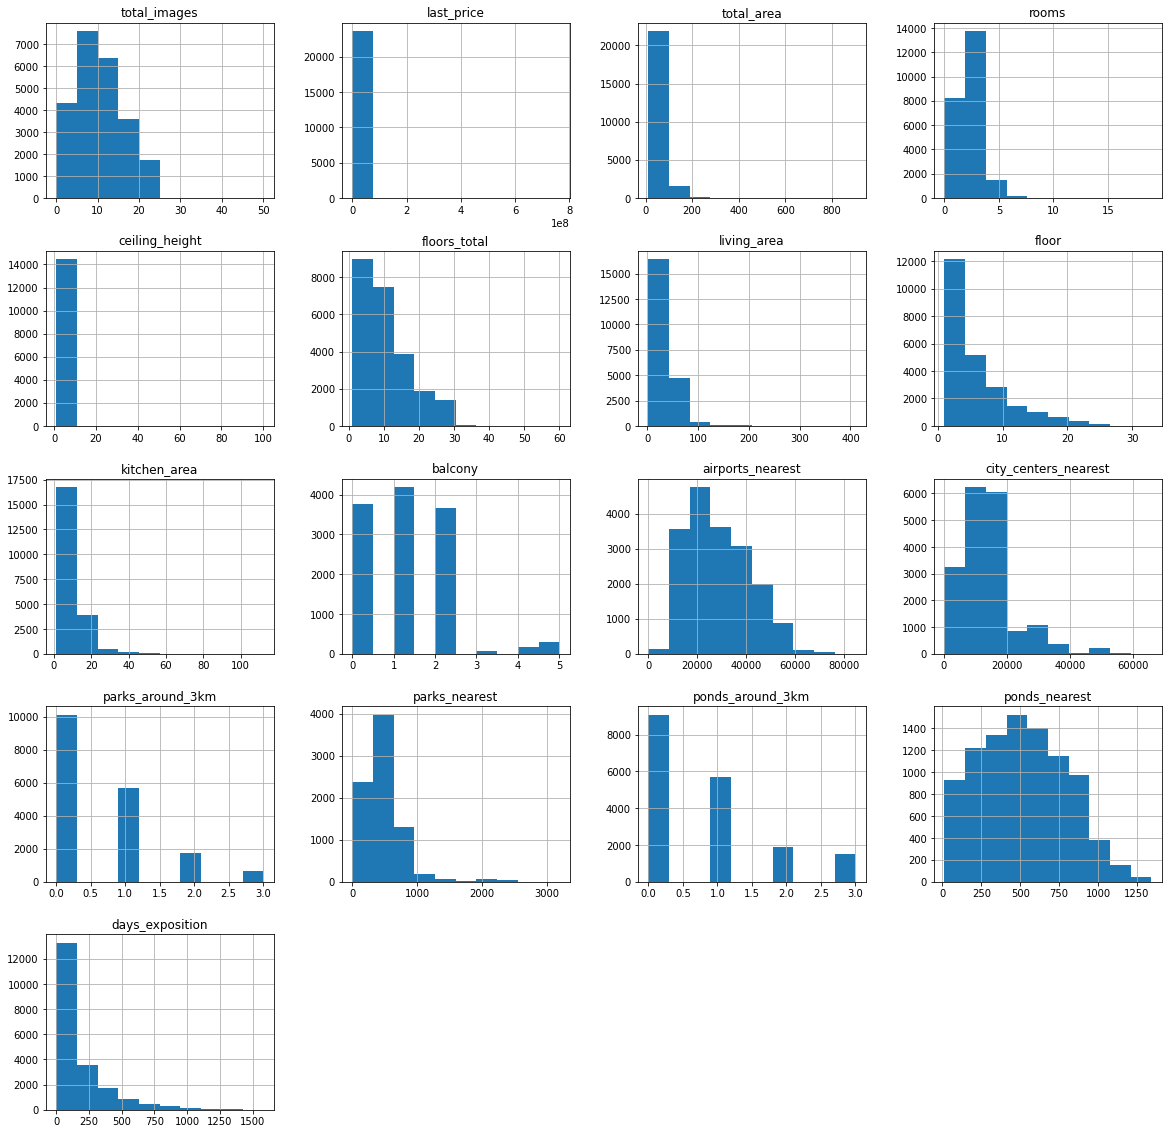

In [4]:
# Проанализируем гистограммы для каждого показателя
data.hist(figsize=(20,20))

**Вывод:**
Анализируя гистограммы нельзя дать сразу же какую-либо точную оценку данным, т.к. данные могут содержать большое количество пропущенных и некорректных значений. По этой причине необходимо для начала необходимо заполнить пропущенные значения, а также сократить долю выбросных значений для точной оценки данных

### Предобработка данных

In [5]:
# Определим для числовых данных разброс по значениям для представления общей картины 
# Для более коректного представления данных типа float, изменим формат
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
count,23699.000,23699.000,23699.000,23699.000,14504.000,23613.000,21796.000,23699.000,21421.000,12180.000,18157.000,18180.000,18181.000,8079.000,18181.000,9110.000,20518.000
mean,9.858,6541548.772,60.349,2.071,2.771,10.674,34.458,5.892,10.570,1.150,28793.672,14191.278,0.611,490.805,0.770,517.981,180.889
std,5.683,10887013.268,35.654,1.078,1.261,6.597,22.030,4.885,5.905,1.071,12630.881,8608.386,0.802,342.318,0.938,277.721,219.728
min,0.000,12190.000,12.000,0.000,1.000,1.000,2.000,1.000,1.300,0.000,0.000,181.000,0.000,1.000,0.000,13.000,1.000
25%,6.000,3400000.000,40.000,1.000,2.520,5.000,18.600,2.000,7.000,0.000,18585.000,9238.000,0.000,288.000,0.000,294.000,45.000
50%,9.000,4650000.000,52.000,2.000,2.650,9.000,30.000,4.000,9.100,1.000,26726.000,13098.500,0.000,455.000,1.000,502.000,95.000
75%,14.000,6800000.000,69.900,3.000,2.800,16.000,42.300,8.000,12.000,2.000,37273.000,16293.000,1.000,612.000,1.000,729.000,232.000
max,50.000,763000000.000,900.000,19.000,100.000,60.000,409.700,33.000,112.000,5.000,84869.000,65968.000,3.000,3190.000,3.000,1344.000,1580.000


In [6]:
# По данным видно, что имеется большое количетсво пропущенных значений
# Определим количество пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# Проведем проверку на выявление явных дубликатов 
data.duplicated().sum()

0

Как видно явные дубликаты отсутвуют, поэтому сбрасывать дубликаты не придется. Количество пропущенных значений для некоторых параметров составляет большую часть, данные могли быть пропущенны по причине неправильной выгрузки датасета, а также часть данных вводились людьми самостоятельно и могли быть пропущенны целенаправленно. Некоторые столбцы несут важную информацию для иследования и там, где это возможно их необходимо заполнить. 

**2.1 Заполнение пропущенных значений**

Анализируя пропущенные значения, можно сделать вывод, что данные пропущенные по картографическим показателям мы заполнить не сможем. Наибольшее количество пропусков в столбце is_apartment, данный столбец не несет важной информации и не будет использоваться дальше в рассчетах, поэтому удалим данный столбец. 

Пропущенные значение в столбце balcony указывают на то, что пользователь просто не заполнил данный столбец, т.к. балкона нет , поэтому можно заменить все пропущенные значения на 0.
В стобце locality_name небольшое количество пропущенных значений в названии населеного пункта, поэтому данные строки можно также отбросить, потому что они составляют меньше 1%. Также можно избавиться от пропущенных данных в столбце floor, т.к. они составляют маленькую часть от общего числа.

In [8]:
# Удаление пропущенных значений в столбце locality_name
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
# Заполнение пропусков в столбце balcony
data['balcony'] = data['balcony'].fillna(0)
# Удаление столбца is_apartment 
data = data.drop(['is_apartment'], axis=1)
# Удаление пропущенных значений в стобце floor и floors total
data = data.dropna(subset=['floor']).reset_index(drop=True)
data = data.dropna(subset=['floors_total']).reset_index(drop=True)
# Проверка
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3km         5500
parks_nearest           15535
ponds_around_3km         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

**2.2  Удаление неявных дубликатов столбце locality_name**

Изучим уникальные значения в столбце locality_name для устранения неявных дубликатов

In [9]:
print(data['locality_name'].unique())
print()
print('Количество уникальных значений:', len(data['locality_name'].unique()))

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Видно, что неявные дубликаты отличаются только добавлением перед названием населеного пункта уточнением статуса (деревня,поселок и тд). По этой причине можно отрезать статус населенного пункта и оставить только названия с заглавной буквы. Что позволит снизить количество неявных дубликатов.


In [10]:
# Напишем функцию, которая будет выявлять соответствие буквы прописному варианту, также будет учитывать пробел и возвращать индекс заглавной буквы
def find_city(name):
    for symbol in name:
        if (symbol == symbol.upper() and symbol != ' '):
            return name.index(symbol)
        
# Используюм функцию find_city для каждого уникального значения в списке и отбрасываем часть, которая находится до заглавной буквы
for names in data['locality_name'].unique():
    index = find_city(names)
    data.loc[data['locality_name'] == names, 'locality_name'] = names[index:]

# Проверим количество уникальных значений 
print(data['locality_name'].unique())
print()
print('Количество уникальных значений:', len(data['locality_name'].unique()))  

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодёжное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалёво' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' '

**2.3 Обработка столбца ceiling_height**

При анализе данных заметно, что некоторые значение в столбце ceiling_height не соответсвует действительности. Хоть медианное значение находится на адекватном значениии, мы видим высота у нас принимает значение от 1м до 100м, что нелогично. Средняя высота потолков в обычных дома колеблется в диапазоне 2,5 до 5 по стандартам, поэтому аномальные значения будем заменять на медианное значение входящих в диапазон 2,5 до 5.

In [11]:
# Значение в столбце ceiling_height
data['ceiling_height'].describe() 

count   14481.000
mean        2.771
std         1.262
min         1.000
25%         2.510
50%         2.650
75%         2.800
max       100.000
Name: ceiling_height, dtype: float64

In [12]:
# Найдем медианное значение среди данных находящихся в интервале 2.5 до 5 м
median_height = data.query('2.5 <= ceiling_height <= 5')['ceiling_height'].median()
#Заменим пропущенные значения медианным
data['ceiling_height'] = data['ceiling_height'].fillna(median_height)
#Удалим аномальные строки
data = data.query('2.5 <= ceiling_height <= 5').reset_index(drop=True)
#Проверка
data['ceiling_height'].describe()

count   23456.000
mean        2.697
std         0.215
min         2.500
25%         2.600
50%         2.650
75%         2.700
max         5.000
Name: ceiling_height, dtype: float64

In [13]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1857
floor                       0
studio                      0
open_plan                   0
kitchen_area             2206
balcony                     0
locality_name               0
airports_nearest         5483
city_centers_nearest     5460
parks_around_3km         5459
parks_nearest           15467
ponds_around_3km         5459
ponds_nearest           14457
days_exposition          3153
dtype: int64

**2.4 Обработка столбца total_area, living_area, kitchen_area**

In [14]:
data[['total_area', 'living_area' , 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,23456.000,21599.000,21250.000
mean,60.327,34.450,10.567
std,35.569,22.022,5.895
min,12.000,2.000,1.300
25%,40.000,18.600,7.000
50%,52.000,30.000,9.100
75%,69.800,42.300,12.000
max,900.000,409.700,112.000


Анализируя данные можно заметить очень маленькие значения в площадях, по стандартам площадь квартир студий не должны быть меньше 20 м2, жилая площадь на одного человека не менее 14 м2, а кухни не менее 5 м2. Поэтому отсечем аномально низкие значения, а также проверим условие, что living_area + kitchen_area < total_area и условие отсечем также квартиры в которых площадь kitchen_area > living_area  . Также необходимо отбросить максимальное большие значения, квартиры площадью 900 м2 больше подходят под тип складов нежели квартир. Хоть таких значений и не много, мы также учитывая гистограммы внизу примем потолок ограничений квартир по площади (total_area < 250м2, living_area < 200 , kitchen_area < 50 м2]

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>, <AxesSubplot:>]],
      dtype=object)

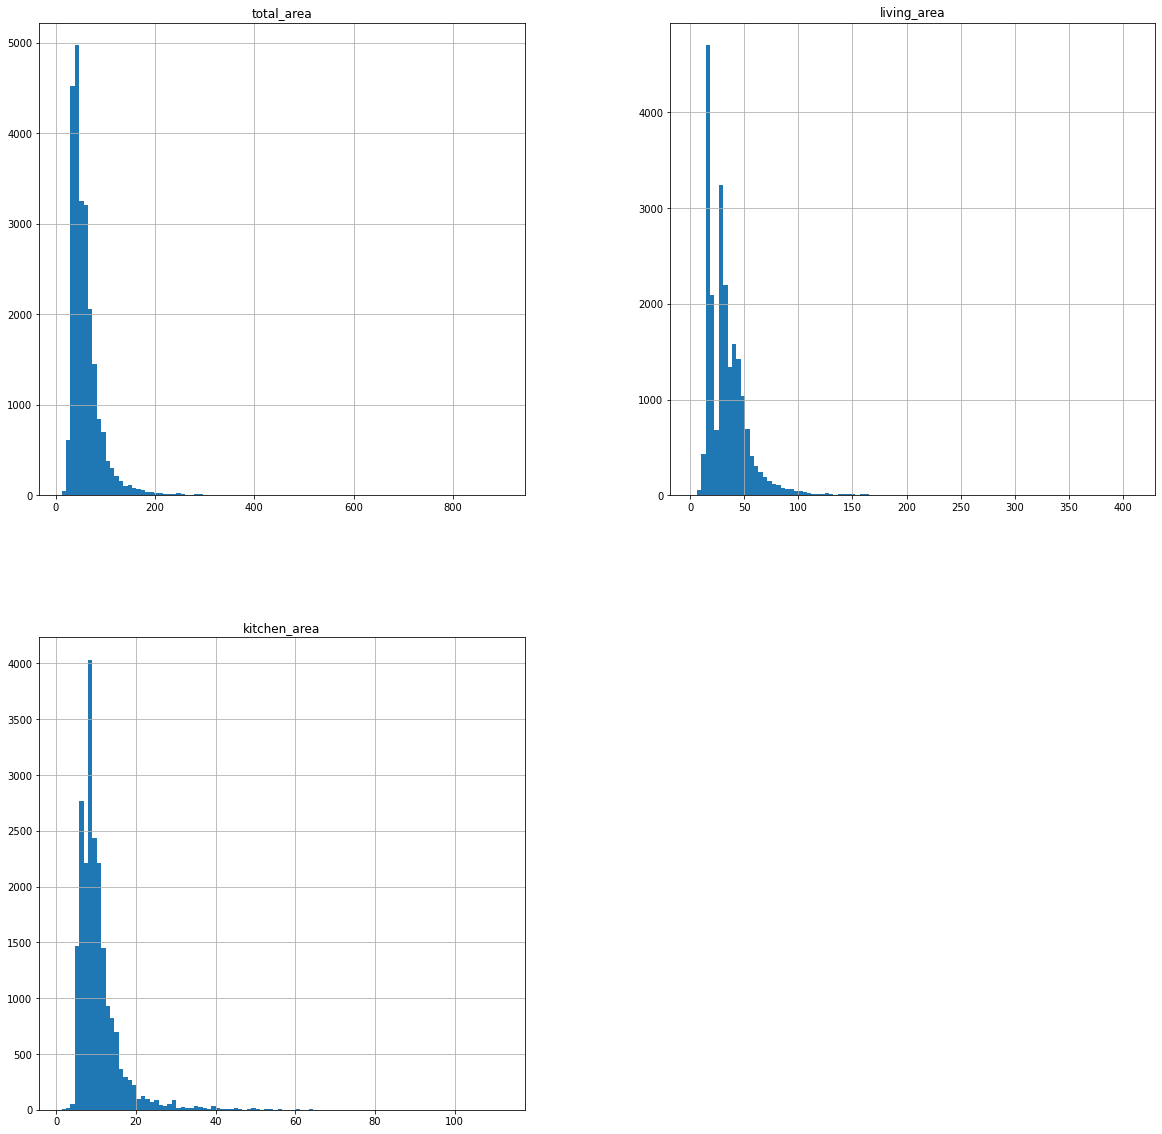

In [15]:
data[['total_area', 'living_area' , 'kitchen_area']].hist(bins=100, figsize=(20,20))

In [16]:
#Код ревьюера
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23456 entries, 0 to 23455
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23456 non-null  int64  
 1   last_price            23456 non-null  float64
 2   total_area            23456 non-null  float64
 3   first_day_exposition  23456 non-null  object 
 4   rooms                 23456 non-null  int64  
 5   ceiling_height        23456 non-null  float64
 6   floors_total          23456 non-null  float64
 7   living_area           21599 non-null  float64
 8   floor                 23456 non-null  int64  
 9   studio                23456 non-null  bool   
 10  open_plan             23456 non-null  bool   
 11  kitchen_area          21250 non-null  float64
 12  balcony               23456 non-null  float64
 13  locality_name         23456 non-null  object 
 14  airports_nearest      17973 non-null  float64
 15  city_centers_neares

In [17]:
# Удаление аномальных значений в столбцах 
data = data.query('total_area >= 20').reset_index(drop=True)
data[['total_area', 'living_area' , 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,23429.000,21581.000,21246.000
mean,60.377,34.468,10.568
std,35.558,22.022,5.895
min,20.000,2.000,1.300
25%,40.000,18.600,7.000
50%,52.000,30.000,9.100
75%,69.900,42.300,12.000
max,900.000,409.700,112.000


Теперь мы видим, что площади квартир соответствуют более менее реальным показателям. Столбцы studio и open_plan имеет булево значение, пропусков в этих данных нет и никакой информации для иследования они не несут, по этой причине их обрабатывать нет необходимости

In [18]:
#Код ревьюера
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23429 entries, 0 to 23428
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23429 non-null  int64  
 1   last_price            23429 non-null  float64
 2   total_area            23429 non-null  float64
 3   first_day_exposition  23429 non-null  object 
 4   rooms                 23429 non-null  int64  
 5   ceiling_height        23429 non-null  float64
 6   floors_total          23429 non-null  float64
 7   living_area           21581 non-null  float64
 8   floor                 23429 non-null  int64  
 9   studio                23429 non-null  bool   
 10  open_plan             23429 non-null  bool   
 11  kitchen_area          21246 non-null  float64
 12  balcony               23429 non-null  float64
 13  locality_name         23429 non-null  object 
 14  airports_nearest      17952 non-null  float64
 15  city_centers_neares

**2.5 Обработка столбца last_price и days_exposition**

In [19]:
data[['last_price', 'days_exposition']].describe()

,last_price,days_exposition
count,23429.000,20276.000
mean,6538971.623,180.948
std,10856612.146,219.989
min,12190.000,1.000
25%,3444000.000,45.000
50%,4650000.000,95.000
75%,6800000.000,231.000
max,763000000.000,1580.000


Анализуя таблице сомнения вызывает очень низкое и большое значение цены квартиры, по этой причине посмотрим много ли квартир находится в аномальных значениях, либо же это ошибочное значение.

In [20]:
data.query('last_price < 500000 or last_price > 100000000').sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
8700,7,12190.000,109.000,2019-03-20T00:00:00,2,2.750,25.000,32.000,25,False,...,40.500,0.000,Санкт-Петербург,36421.000,9176.000,1.000,805.000,0.000,NaN,8.000
14748,5,430000.000,54.000,2018-06-26T00:00:00,2,2.650,3.000,NaN,3,False,...,NaN,0.000,Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.000
17270,7,430000.000,30.400,2019-04-22T00:00:00,1,2.650,2.000,16.000,1,False,...,6.000,0.000,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16102,18,440000.000,40.000,2018-07-10T00:00:00,1,2.650,5.000,NaN,1,False,...,NaN,0.000,Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.000
17486,0,450000.000,36.500,2018-02-01T00:00:00,1,2.650,5.000,17.300,4,False,...,8.500,1.000,Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.000
9480,7,450000.000,43.400,2018-08-31T00:00:00,2,2.650,5.000,30.300,3,False,...,5.500,0.000,Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.000
5641,7,450000.000,42.000,2017-07-31T00:00:00,2,2.650,1.000,23.000,1,False,...,5.800,0.000,Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.000
16048,14,450000.000,38.500,2018-07-11T00:00:00,2,2.650,2.000,NaN,1,False,...,NaN,0.000,Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.000
23218,11,470000.000,44.500,2018-07-02T00:00:00,2,2.650,2.000,28.000,2,False,...,7.500,0.000,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298.000
18667,1,470000.000,41.000,2018-02-11T00:00:00,1,2.650,5.000,32.000,3,False,...,9.000,0.000,Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.000


Хоть аномальных значений всего 14 строк, можно предположить, что низкая цена обусловлена тем, что квартира находится в провинции, а огромные суммы можно считать элитной недвижимостью находящемся в крупном городе.

Столбец days_exposition показывает сколько дней было размещено объявление (от публикации до снятия), поэтому значения 1500 дней и 1 день очень сильно влияют на общую картину, посмотрим сколько объявлений составляет эти данные. За интервал возьмем промежуток от 2 недель до 6 месяцев, чтобы проанализировать ситуация на свежие данные.

In [21]:
data.query('days_exposition < 14 or days_exposition > 180')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,2.650,5.000,34.300,4,False,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,2.650,14.000,NaN,9,False,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,2.650,27.000,15.430,26,False,...,8.810,0.000,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000
9,18,5400000.000,61.000,2017-02-26T00:00:00,3,2.500,9.000,43.600,7,False,...,6.500,2.000,Санкт-Петербург,50898.000,15008.000,0.000,NaN,0.000,NaN,289.000
11,9,3300000.000,44.000,2018-08-27T00:00:00,2,2.650,5.000,31.000,4,False,...,6.000,1.000,Ломоносов,48252.000,51677.000,0.000,NaN,0.000,NaN,7.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23416,8,3300000.000,31.000,2017-04-29T00:00:00,1,2.550,9.000,18.000,6,False,...,6.500,0.000,Санкт-Петербург,11751.000,11602.000,1.000,140.000,1.000,317.000,193.000
23421,11,9470000.000,72.900,2016-10-13T00:00:00,2,2.750,25.000,40.300,7,False,...,10.600,1.000,Санкт-Петербург,19424.000,4489.000,0.000,NaN,1.000,806.000,519.000
23422,2,1350000.000,30.000,2017-07-07T00:00:00,1,2.650,5.000,17.500,4,False,...,6.000,0.000,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.000
23423,9,4600000.000,62.400,2016-08-05T00:00:00,3,2.600,9.000,40.000,8,False,...,8.000,0.000,Петергоф,45602.000,34104.000,1.000,352.000,1.000,675.000,239.000


Данные объявления составляют почти 40% от имеющихся данных, поэтому как либо изменить и удалять их нет смысла. Поэтому оставим данные и будем учитывать эти особености в дальнейших исследованиях.

**2.6 Обработка столбцов с картографическими данными**

In [22]:
data.loc[:, 'airports_nearest': 'ponds_nearest'].describe()

,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
count,17952.000,17975.000,17976.000,7979.000,17976.000,8984.000
mean,28810.294,14197.451,0.610,490.782,0.769,518.681
std,12635.039,8610.298,0.801,342.335,0.938,277.892
min,0.000,181.000,0.000,1.000,0.000,13.000
25%,18557.000,9245.000,0.000,287.500,0.000,293.000
50%,26766.500,13105.000,0.000,455.000,0.000,503.000
75%,37294.000,16293.000,1.000,612.000,1.000,731.000
max,84869.000,65968.000,3.000,3190.000,3.000,1344.000


Эти данные не подлежат обработке, т.к. выгружались автоматически от местоположения квартиры. Пропуски в этих значениях нельзя как либо заменить, а удалять их не имеет смысла, т.к. они составляют большую часть данных. Единственной обработкой данных столбцов может послужить перерассчет м в км.

In [23]:
data[['airports_nearest', 'city_centers_nearest']] = round((data[['airports_nearest', 'city_centers_nearest']] / 1000), 1)
data[['parks_nearest', 'ponds_nearest']] = round((data[['parks_nearest', 'ponds_nearest']] / 1000), 2)

In [24]:
data.loc[:, 'airports_nearest': 'ponds_nearest'].describe()

,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
count,17952.000,17975.000,17976.000,7979.000,17976.000,8984.000
mean,28.810,14.197,0.610,0.491,0.769,0.519
std,12.635,8.610,0.801,0.342,0.938,0.278
min,0.000,0.200,0.000,0.000,0.000,0.010
25%,18.600,9.200,0.000,0.290,0.000,0.290
50%,26.800,13.100,0.000,0.460,0.000,0.500
75%,37.300,16.300,1.000,0.610,1.000,0.730
max,84.900,66.000,3.000,3.190,3.000,1.340


Также последними штрихами для таблицы, изменим формат времени и поменяем в определенных столбцах формат с float на int.

In [25]:
#Изменим тип отображения даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Поменяем формат для столбцов на int
data[['balcony','floor','floors_total', 'rooms']] = data[['balcony','floor','floors_total', 'rooms']].astype(int)
# Выведем первые 10 строк таблица и информацию о таблице
print(data.head(10))

   total_images   last_price  total_area first_day_exposition  rooms  \
0            20 13000000.000     108.000           2019-03-07      3   
1             7  3350000.000      40.400           2018-12-04      1   
2            10  5196000.000      56.000           2015-08-20      2   
3             0 64900000.000     159.000           2015-07-24      3   
4             2 10000000.000     100.000           2018-06-19      2   
5            10  2890000.000      30.400           2018-09-10      1   
6             6  3700000.000      37.300           2017-11-02      1   
7             5  7915000.000      71.600           2019-04-18      2   
8            20  2900000.000      33.160           2018-05-23      1   
9            18  5400000.000      61.000           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor  studio  ...  \
0           2.700            16       51.000      8   False  ...   
1           2.650            11       18.600      1   False  ...   
2  

In [26]:
# Выведем также информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23429 entries, 0 to 23428
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23429 non-null  int64         
 1   last_price            23429 non-null  float64       
 2   total_area            23429 non-null  float64       
 3   first_day_exposition  23429 non-null  datetime64[ns]
 4   rooms                 23429 non-null  int64         
 5   ceiling_height        23429 non-null  float64       
 6   floors_total          23429 non-null  int64         
 7   living_area           21581 non-null  float64       
 8   floor                 23429 non-null  int64         
 9   studio                23429 non-null  bool          
 10  open_plan             23429 non-null  bool          
 11  kitchen_area          21246 non-null  float64       
 12  balcony               23429 non-null  int64         
 13  locality_name   

**Вывод**

Как видно после обработки таблицы количество строк составило 19918, получается количетсво аномальных данных уменьшилось почти 20 процентов. Данная обработка позволит в дальнейшем дать более рациональную оценку ситуации на рынке, и позволит точнее ответить на поставленные вопросы.

### Посчитайте и добавьте в таблицу новые столбцы

**Добавление столбца с ценой за 1 м2**

In [27]:
data['price_1m'] = round(data['last_price']/data['total_area'])
print(data['price_1m'])

0       120370.000
1        82921.000
2        92786.000
3       408176.000
4       100000.000
           ...    
23424    72491.000
23425    52542.000
23426    44092.000
23427   149511.000
23428    41796.000
Name: price_1m, Length: 23429, dtype: float64


**Добавление столбцов с датой публикации**

In [28]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
print(data[['weekday', 'month', 'year']])

       weekday  month  year
0            3      3  2019
1            1     12  2018
2            3      8  2015
3            4      7  2015
4            1      6  2018
...        ...    ...   ...
23424        1      3  2017
23425        0      1  2018
23426        6      2  2018
23427        1      3  2017
23428        4      7  2017

[23429 rows x 3 columns]


**Добавление столбца с типом этажа квартиры**

In [29]:
# Создадим функцию для перебора квартир
def type_floor(number):
    if number['floor'] == 1:
        return 'Первый'
    elif number['floor'] == number['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
    
# Добавление нового столбца с категорией этажа
data['floor_kategory'] = data.apply(type_floor, axis=1)

data['floor_kategory']

0        Другой
1        Первый
2        Другой
3        Другой
4        Другой
          ...  
23424    Другой
23425    Другой
23426    Первый
23427    Другой
23428    Первый
Name: floor_kategory, Length: 23429, dtype: object

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23429 entries, 0 to 23428
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23429 non-null  int64         
 1   last_price            23429 non-null  float64       
 2   total_area            23429 non-null  float64       
 3   first_day_exposition  23429 non-null  datetime64[ns]
 4   rooms                 23429 non-null  int64         
 5   ceiling_height        23429 non-null  float64       
 6   floors_total          23429 non-null  int64         
 7   living_area           21581 non-null  float64       
 8   floor                 23429 non-null  int64         
 9   studio                23429 non-null  bool          
 10  open_plan             23429 non-null  bool          
 11  kitchen_area          21246 non-null  float64       
 12  balcony               23429 non-null  int64         
 13  locality_name   

### Проведите исследовательский анализ данных

**4.1 Построение и анализ гистограмм для каждого показателя**

**4.1.1 Анализ по столбцу total_area**

Text(0, 0.5, 'Количество квартир')

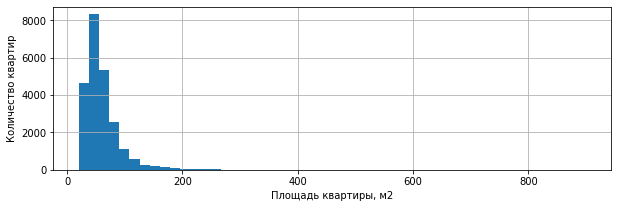

In [31]:
import matplotlib.pyplot as plt
data['total_area'].hist(bins=50, grid=True, figsize=(10,3))
plt.xlabel('Площадь квартиры, м2')
plt.ylabel('Количество квартир')

**Вывод:** Основную долю составляют квартиры площадью от 30 до 80 м2, с увелечением плозади начиная со 100  м2 количество квартир заметно уменьшается.

**4.1.2 Анализ по столбцу living_area**

Text(0, 0.5, 'Количество квартир')

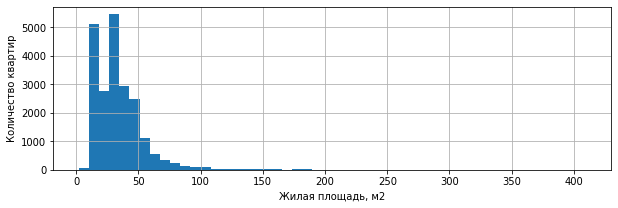

In [32]:
data['living_area'].hist(bins=50, grid=True, figsize=(10,3))
plt.xlabel('Жилая площадь, м2')
plt.ylabel('Количество квартир')

**Вывод:** Максимально распространенная площадь примерно составляет 18 м2, также у нас имеются пики, которые можно связать с количеством комнат в квартире.

**4.1.3 Анализ по столбцу kitchen_area**

Text(0, 0.5, 'Количество квартир')

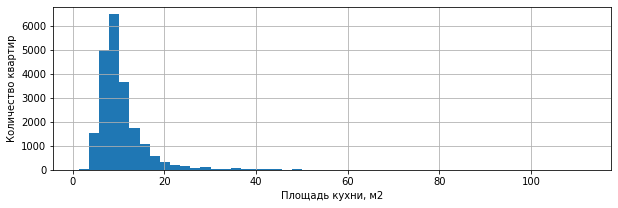

In [33]:
data['kitchen_area'].hist(bins=50, grid=True, figsize=(10,3))
plt.xlabel('Площадь кухни, м2')
plt.ylabel('Количество квартир')

**Вывод:** Максимальные значения характерны от 5 до 10 м2, количество квартир с кухнями от 15 м2 встречаются реже.

**4.1.4 Анализ по столбцу last_price**

Text(0, 0.5, 'Количество квартир')

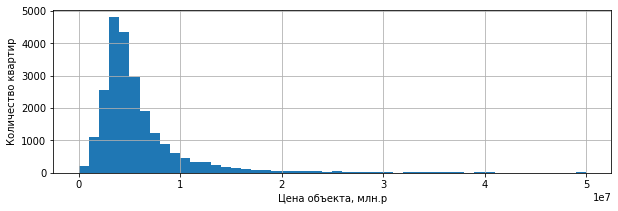

In [34]:
data['last_price'].hist(bins=50, grid=True, figsize=(10,3), range=(0,50000000))
plt.xlabel('Цена объекта, млн.р')
plt.ylabel('Количество квартир')

**Вывод:** Средняя цена за квартиру составляет порядка 5 млн.р, самое дешевые предложения начинаются от 500тыс.р.

**4.1.5 Анализ по столбцу rooms**

Text(0, 0.5, 'Количество квартир')

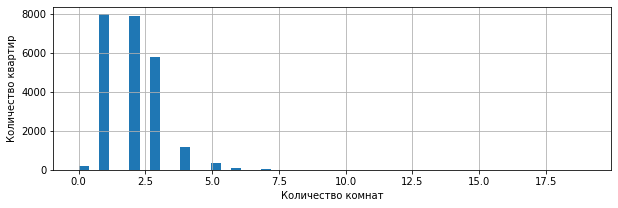

In [35]:
data['rooms'].hist(bins=50, grid=True, figsize=(10,3))
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

**Вывод:** Наибольшей популярностью пользуются 1 и 2-ух комнатные квартиры, также хороший процент занимают трешки,  квартиры с количеством комнат от 4-ех  пользуются редким спросом.

**4.1.6 Анализ по столбцу ceiling_height**

Text(0, 0.5, 'Количество квартир')

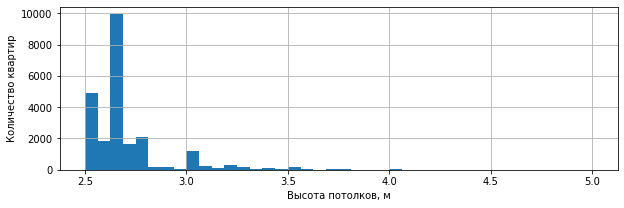

In [36]:
data['ceiling_height'].hist(bins=40, grid=True, figsize=(10,3))
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество квартир')

**Вывод:** Наибольшее распространние получили потолки с высотой 2.7, это можно связать также с тем, что аномальные значения были заменены медианным.

**4.1.7 Анализ по столбцу floor**

Text(0, 0.5, 'Количество квартир')

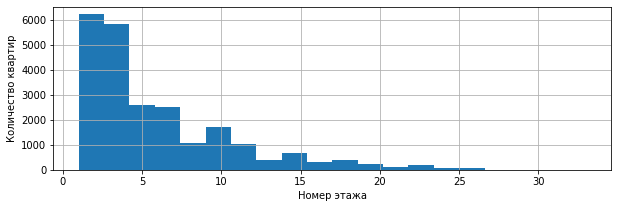

In [37]:
data['floor'].hist(bins=20, grid=True, figsize=(10,3))
plt.xlabel('Номер этажа')
plt.ylabel('Количество квартир')

**Вывод:** Люди преимущественно живут в квартирах до 5 этажа, также значительную часть составляют жильцы с 5 по 10 этаж.

**4.1.8 Анализ по столбцу floor_kategory**

Text(0, 0.5, 'Количество квартир')

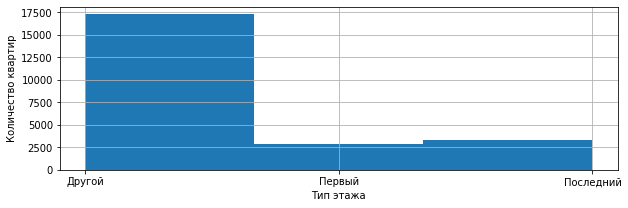

In [38]:
data['floor_kategory'].hist(bins=3, grid=True, figsize=(10,3))
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')

**Вывод:** Все логично, квартиры на первом и последнем этаже приблизительно равны, квартиры на других этажах составляют большую часть.

**4.1.9 Анализ по столбцу floors_total**

Text(0, 0.5, 'Количество квартир')

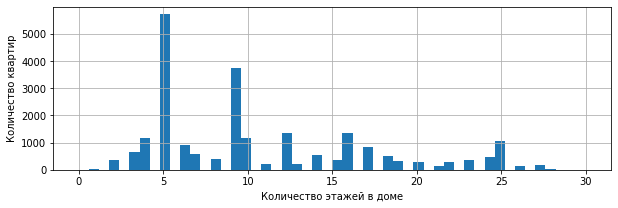

In [39]:
data['floors_total'].hist(bins=50, grid=True, figsize=(10,3), range=(0,30))
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир')

**Вывод:** Большое количество домов имеют 5 этажей, второе место занимают 9-этажки, остальные этажи распредлены почти на одном уровне.

**4.1.10 Анализ по столбцу city_сenters_nearest**

Text(0, 0.5, 'Количество квартир')

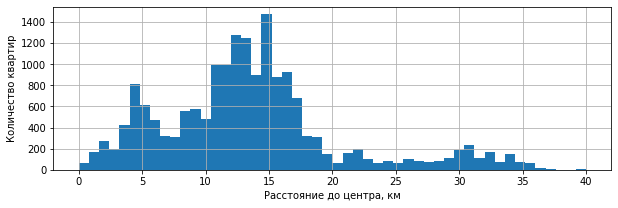

In [40]:
data['city_centers_nearest'].hist(bins=50, grid=True, figsize=(10,3), range=(0,40))
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Количество квартир')

**Вывод:** В среднем квартиры находятся от центра в диапазоне от 10 до 17 км, также просматривается пик на 5 км.

**4.1.11 Анализ по столбцу airports_nearest**

Text(0, 0.5, 'Количество квартир')

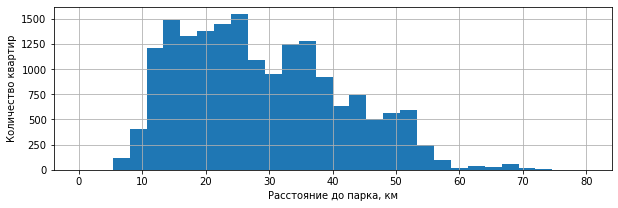

In [41]:
data['airports_nearest'].hist(bins=30, grid=True, figsize=(10,3), range=(0,80))
plt.xlabel('Расстояние до парка, км')
plt.ylabel('Количество квартир')

**Вывод:** Квартиры в большей степени находятся на расстоянии от 10 км от аэропорта, но есть небольшой процент людей, которые тяжело спят по ночам из-за звуков пролетающего самолета.

**4.1.12 Анализ по столбцу parks_nearest**

Text(0, 0.5, 'Количество квартир')

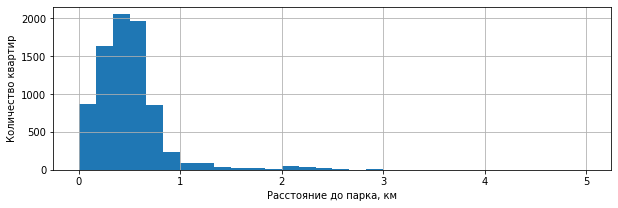

In [42]:
data['parks_nearest'].hist(bins=30, grid=True, figsize=(10,3), range=(0,5))
plt.xlabel('Расстояние до парка, км')
plt.ylabel('Количество квартир')

**Вывод:** Как видим, почти у большей части квартир парк находится в 10 минутах ходьбы, а то и менше.

**4.1.13 Анализ по столбцу weekday**

Text(0, 0.5, 'Количество квартир')

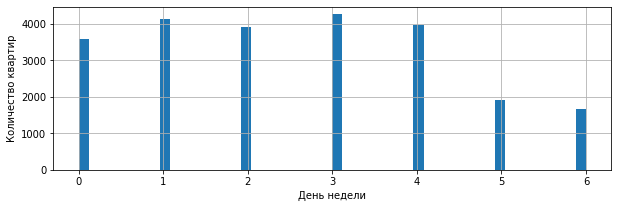

In [43]:
data['weekday'].hist(bins=50, grid=True, figsize=(10,3))
plt.xlabel('День недели')
plt.ylabel('Количество квартир')

**Вывод:** Видно, что объявления в основном выкладывались в будние дни.

**4.1.14 Анализ по столбцу month**

Text(0, 0.5, 'Количество квартир')

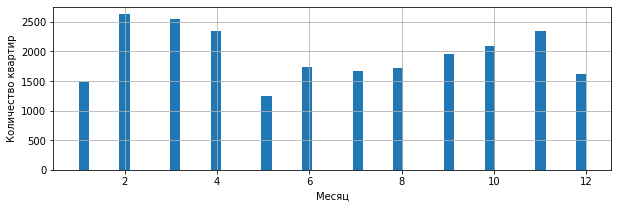

In [44]:
data['month'].hist(bins=50, grid=True, figsize=(10,3))
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')

**Вывод:** Самыми активными месяцами для объявлений стали февраль и март, также видно что в летний и зимний период количество объявлений меньше по сравнению с остальными.

**4.2 Задание: "Изучить, как быстро продавались квартиры"**

In [45]:
# Отбросим объявления слишком коротким сроком размещения и объявления висящие больше года
data_time = data.query('14 < days_exposition < 365')
# Найдем среднее и медианное значение в этом интервале
print('Среднее значение', round(data_time['days_exposition'].mean(),3))
print('Медианное значение', round(data_time['days_exposition'].median(),3))
data_time['days_exposition'].describe()

Среднее значение 115.537
Медианное значение 88.0


count   15491.000
mean      115.537
std        87.902
min        15.000
25%        45.000
50%        88.000
75%       165.000
max       364.000
Name: days_exposition, dtype: float64

<AxesSubplot:>

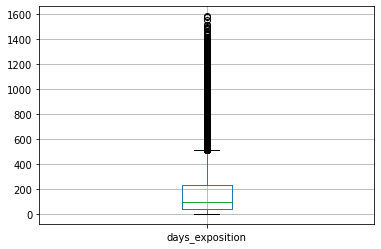

In [46]:
data.boxplot(column='days_exposition')


**Вывод:** Среднее значение составляет 119 дней, а медианное значение 91. Быстрыми продажами можно считать квартиры, которые попадают в первый квартиль ( до 45 дней), средними объявления, находящиеся в втором и третьем квартиле (от 45 до 160 дней), а долгими можно считать квартиры объявление, которых провисело больше 160 дней.

**4.3 Задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта?"**

In [47]:
# Создание новой таблица с необходимыми параметрами
data_new = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'weekday', 'month', 'year', 'floor_kategory']]
# Рассчет коэффициент кореляции параметров к цене
data_new.corr()['last_price']

last_price      1.000
total_area      0.652
living_area     0.564
kitchen_area    0.519
rooms           0.362
weekday         0.002
month           0.003
year           -0.042
Name: last_price, dtype: float64

**Как видно наибольшим коэффициентом корреляции обладает общая площадь квартиры 0.659 , второе место между собой делит площадь жилой и кухонной зоны, количество комнат замыкает эту тройку. Как видно из таблицы день, месяц и год никак не влияют на стоимость квартиры. Для большей наглядности построим диаграмму рассеивания для каждого фактора.**

Text(0.5, 1.0, 'Зависимость цены от общей площади')

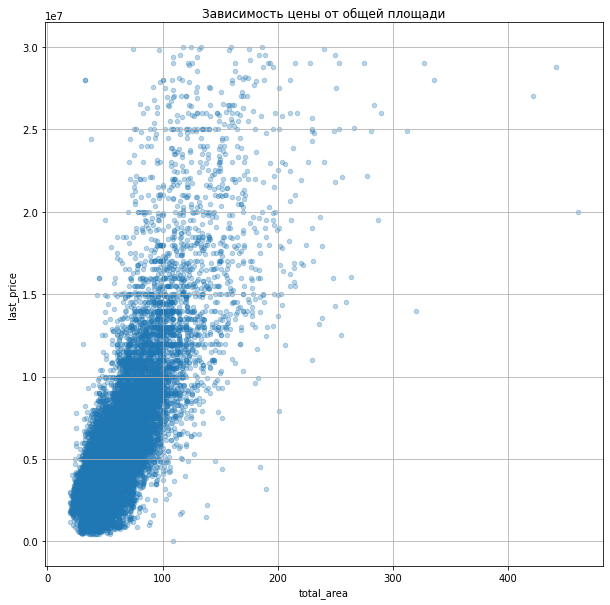

In [48]:
data_sort = data.query('last_price < 30000000 and rooms < 8') # Отсортируем большие значения по цене и комнатам
data_sort.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(10,10), alpha=0.3)
plt.title('Зависимость цены от общей площади')

Text(0.5, 1.0, 'Зависимость цены от жилой площади')

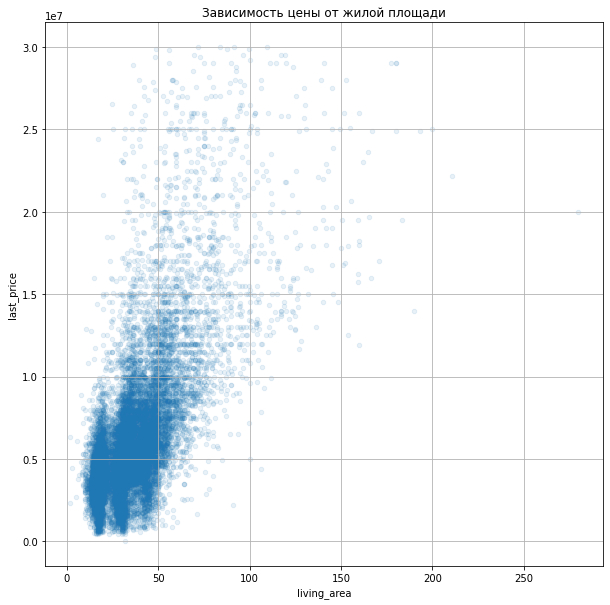

In [49]:
data_sort.plot(x='living_area', y='last_price', kind='scatter', grid=True, figsize=(10,10), alpha=0.1)
plt.title('Зависимость цены от жилой площади')

Text(0.5, 1.0, 'Зависимость цены от площади кухни')

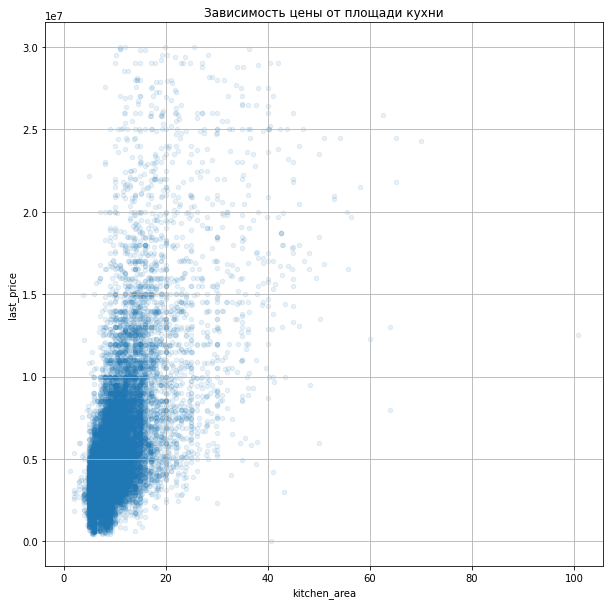

In [50]:
data_sort.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, figsize=(10,10), alpha=0.1)
plt.title('Зависимость цены от площади кухни')

Text(0.5, 1.0, 'Зависимость цены от количества комнат')

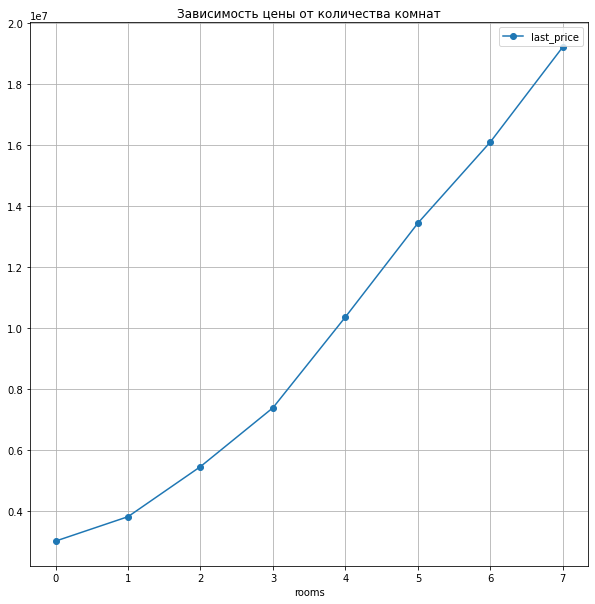

In [51]:
# Построение графика зависимости медианного значения цены для каждого количества комнат
data_sort.pivot_table(index='rooms', values='last_price').plot(style='o-', grid=True, figsize=(10,10))
plt.title('Зависимость цены от количества комнат')

**Вывод:** После построения диаграмм рассеиваний коэффиценты корреляции полученные выше потвердились, хоть на графиках имеется много точек лежащих за пределами нормальной области по общей густоте данных можно судить о прямопропорциональной зависимости цены квартиры от параметров. Для количества комнат график рассеивания не является подходящим, поэтому был построен график зависимости медианного значения цены квартиры от количетсва комнат. 

Также ниже представлена зависимость типа этажа от цены, т.к. формат значений это строка, то здесь подойдет столбчатая диаграмма. По ней можно решить квартиры на первых этажах продаются дешевле всего, квартиры на последних этажах также находятся в ценовом сегменте на уровень ниже.

Text(0.5, 1.0, 'Зависимость цены от типа этажа')

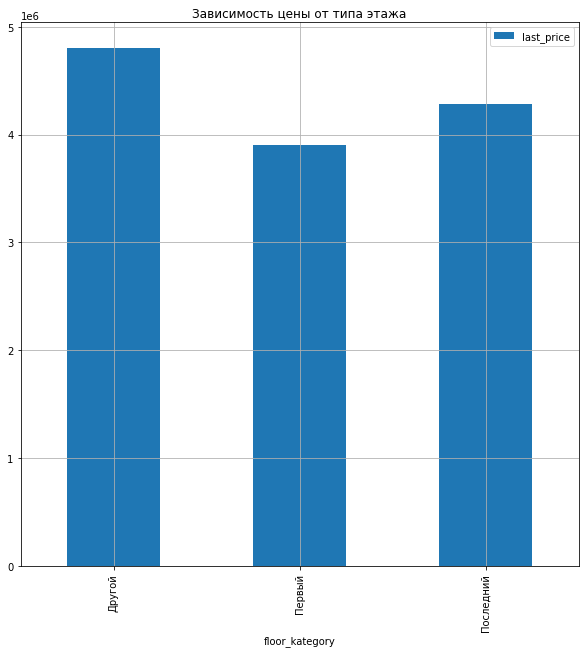

In [52]:
# Построение столбчатой диаграммы между типом этажа и ценой
data_sort.pivot_table(index='floor_kategory', values='last_price', aggfunc='median').plot(kind='bar', grid=True, figsize=(10,10))
plt.title('Зависимость цены от типа этажа')

**4.4 Задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений"**

In [53]:
data_top = data.pivot_table(index='locality_name', values='price_1m', aggfunc=['count', 'mean'])
data_top.columns = ['Количество объявлений', 'Средняя цена за 1м2']
data_top_10 = data_top.sort_values(by='Количество объявлений', ascending=False).head(10)
data_top_10

,Количество объявлений,Средняя цена за 1м2
locality_name,,
Санкт-Петербург,15575,114775.585
Мурино,584,86018.110
Кудрово,469,95261.989
Шушары,438,78529.251
Всеволожск,397,68719.322
Пушкин,365,103102.847
Колпино,337,75443.964
Парголово,326,90205.396
Гатчина,306,68757.644


In [54]:
print('Город с максимальной стоимостью 1 м2: Санкт-Петербург', data_top_10['Средняя цена за 1м2'].max().round(2))
print('Город с минимальной стоимостью 1 м2: Выборг', data_top_10['Средняя цена за 1м2'].min().round(2))

Город с максимальной стоимостью 1 м2: Санкт-Петербург 114775.59
Город с минимальной стоимостью 1 м2: Выборг 58238.15


**Вывод:** Как и предполагалось самая большая цена за 1 м2 занимает Санкт-Петербург вторая столица России, минимальную стоимость в топе 10 объявлений занимает Гатчина, цена которой почти в два раза ниже по сравнению с Санкт-Петербургом

**4.5 Задание: "Выделите квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра"**

Text(0.5, 1.0, 'Средняя цена каждого километра в Санкт-Петербурге')

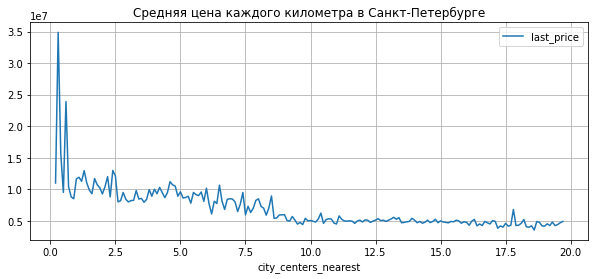

In [55]:
data_piter = data.query('locality_name == "Санкт-Петербург" and city_centers_nearest < 20')
# Отсортировываем данные из Питера и возьмем ограничения по расстоянию 
data_piter.pivot_table(index='city_centers_nearest', values='last_price', aggfunc='median').plot(style='-', grid=True, figsize=(10,4))
plt.title('Средняя цена каждого километра в Санкт-Петербурге')
# Строим график зависимости медианное ценны от расстония центра Питера

**Вывод:** По графику можно утверждать, что цена квартиры в Санкт-Петербурге сильно зависит от расстрояния до центра. На расстоянии до 10 км ценник каждого километра может достигать 1 до 3 млн рублей. После 10 км ценник каждого км составляет в среднем 500тыс.р. Пики, которые всплывают дальше могут причиной большой площади квартир с высокой ценой, что увеличивает медианное значение.

### Общий вывод

В проекте были выполнены следующие задачи: определены и заполнены пропущенные значения в данных, а также были обнаружены и устранены редкие и выбивающиеся значения (аномалии) во всех столбцах. Также изменены типы данных для определенных столбцов и устранены неявные дубликаты в названиях населенных пунктов.

Построены гистограммы для каждого параметра и проанализированы, какие факторы оказывают наибольшее влияние на общую (полную) стоимость объекта. На основе полученных результатов были построены графики, показывающие зависимость цены от указанных параметров.

В результате исследования были выявлены основные факторы, влияющие на рыночную стоимость недвижимости. Они включают в себя местоположение объекта, общую площадь, количество комнат и этаж, на котором находится объект. Местоположение влияет на цену в зависимости от удаленности от центра города и наличия инфраструктуры. В крупных городах цена недвижимости напорядок выше, чем в маленьких. Общая площадь имеет наибольшее влияние на цену, а количество комнат также напрямую связано с ценой объекта. Квартиры на первом и последнем этаже обладают меньшей ценой, чем остальные, но при этом кардинально не меняют стоимость жилья. Таким образом, при оценке стоимости недвижимости необходимо учитывать все выше перечисленные факторы.